### CLASS INHERITANCE

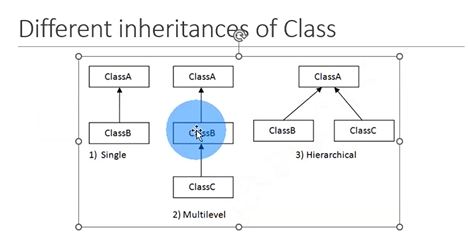

### Parent class will inherit the attributes and methods or functions of the parent class

### Single Inheritance 
1. Parent Class 2.Child Class

In [2]:
class Person:

    def __init__(self, name: str, age: int): # __init__ means to initialize
        self.name = name
        self.age = age

    def introduce(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")

In [3]:
# For multiple inheritance you can add classess
# While starting to write any class do always start with constructor functions first

class Employee(Person):

    def __init__(self, name: str, age: int, company: str):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work at {self.company}")

In [4]:
# Here employee class can use both functions introduce and work both 

In [5]:
p1 = Person("Rahul",28)
type(p1)

__main__.Person

In [6]:
p1.name

'Rahul'

In [7]:
p1.age

28

In [8]:
p1.introduce()

My name is Rahul
I am 28 years old


In [9]:
e1 = Employee("Aditi", 25, "Infosys")
type(e1)

__main__.Employee

In [10]:
e1.name

'Aditi'

In [11]:
e1.age

25

In [12]:
e1.company

'Infosys'

In [13]:
e1.work()

I work at Infosys


In [14]:
e1.introduce()

My name is Aditi
I am 25 years old


In [15]:
e1.introduce() # Introduce function is inherited from Parent class person
e1.work()

My name is Aditi
I am 25 years old
I work at Infosys


### Data Validation with Pydantic (package in python to perform data validation)

In [16]:
%pip install pydantic email-validator

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pydantic in d:\advance python\repository\venv\lib\site-packages (2.10.6)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Conditions pydantic
1. gt - greater than
2. ge - greater than pr equal to
3. lt - less than
4. le - less than or equal to

In [17]:
[1,2,4,5,5]
["ab"]

['ab']

In [18]:
# We can input things from pydantic also can validate email from its validator
from pydantic import BaseModel, Field, EmailStr

In [19]:
# For extra typings or writings in python we have extra libraries
from typing import Literal

In [20]:
class Student(BaseModel):
    roll_no: int = Field(description="Student Roll Number", ge=1, le=2000) #roll_no to validate between ge and le
    name: str = Field(description="Student Name",min_length=3, max_length=50)
    gender: Literal["male" , "female"] = Field(description="student gender")
    email: EmailStr = Field(description="Student email")
    hobbies: list[str] = Field(description="Student Hobbies", default_factory=list)

    def get_info(self):
        print(f"Roll No.: {self.roll_no}")
        print(f"Name: {self.name}")
        print(f"Gender: {self.gender}")
        print(f"Hobbies: {self.hobbies}")

In [21]:
# It is use to simplify data value or validate data according to given inputs

In [22]:
s1 = Student(
    roll_no= 101,
    name= "Raman",
    gender= "male",
    email= "raman@test.com",
    hobbies= ["Cricket","Singing"]
)

In [23]:
s1

Student(roll_no=101, name='Raman', gender='male', email='raman@test.com', hobbies=['Cricket', 'Singing'])

In [24]:
s1.roll_no

101

In [25]:
s1.name

'Raman'

In [26]:
s1.email

'raman@test.com'

In [27]:
s1.hobbies

['Cricket', 'Singing']

In [28]:
s1.gender

'male'

In [29]:
s1.get_info()

Roll No.: 101
Name: Raman
Gender: male
Hobbies: ['Cricket', 'Singing']


In [30]:
s2 = Student(
    roll_no= 123,
    name="Rahul",
    gender= "M",
    email= "random",
    hobbies= ["reading"]
)

ValidationError: 2 validation errors for Student
gender
  Input should be 'male' or 'female' [type=literal_error, input_value='M', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='random', input_type=str]

In [ ]:
s2

NameError: name 's2' is not defined

In [ ]:
# As invalid data s2 class is not prepared

In [ ]:
s2 = Student(
    roll_no = -23,
    name = 23,
    gender = 34,
    email= "example",
    hobbies = [1,2,3]
)

ValidationError: 7 validation errors for Student
roll_no
  Input should be greater than or equal to 1 [type=greater_than_equal, input_value=-23, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/greater_than_equal
name
  Input should be a valid string [type=string_type, input_value=23, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
gender
  Input should be 'male' or 'female' [type=literal_error, input_value=34, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='example', input_type=str]
hobbies.0
  Input should be a valid string [type=string_type, input_value=1, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
hobbies.1
  Input should be a valid string [type=string_type, input_value=2, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
hobbies.2
  Input should be a valid string [type=string_type, input_value=3, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type

In [32]:
# With the pyrandic, codes become shorter , urls can also be validated.

s2 = Student(
    roll_no= 401,
    name= "Priya",
    gender= "female",
    email= "priya@example.com"
)

In [33]:
s2

Student(roll_no=401, name='Priya', gender='female', email='priya@example.com', hobbies=[])

In [34]:
s2.roll_no

401

In [35]:
s2.name

'Priya'

In [36]:
s2.gender

'female'

In [37]:
s2.email

'priya@example.com'

In [38]:
s2.hobbies

[]

In [39]:
s2.get_info()

Roll No.: 401
Name: Priya
Gender: female
Hobbies: []


### Multiple Inheritance
Multiple classes can be inherited by 1 child class

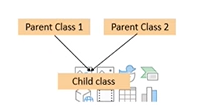

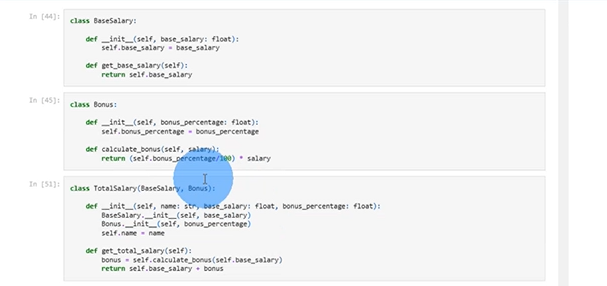

In [41]:
class BaseSalary:


    def __init__(self, base_sal: float):
        self.base_sal = base_sal

    def gat_base_salary(self):
        return self.base_sal

In [42]:
class Bonus:

    def __init__(self, bonus_per: float):
        self.bonus_per = bonus_per

    def calcuculate_bonus(self, sal: float):
        bonus = (self.bonus_per/100)*sal
        return bonus

In [43]:
# above two classes are not inheriting they are different classes

In [44]:
class TotalSalary(BaseSalary, Bonus): # with , we can add multiple classes to it

    def __init__(self,name:str, base_sal:float, bonus_per:float):
        BaseSalary.__init__(self, base_sal) # while calling any class directly use self to call it
        Bonus.__init__(self,bonus_per)
        self.name = name # initialize its own attributes also

    def get_total_salary(self):
        bonus = self.calcuculate_bonus(self.base_sal) # all above functions can be used here directly
        total_sal = self.base_sal + bonus
        return total_sal


In [45]:
t1 = TotalSalary(name="Rakesh", base_sal=5_00_000, bonus_per=20)